<a href="https://colab.research.google.com/github/fkihu/Model-Quality-and-Improvement-Assignment/blob/main/Week_6D4_Assignment_Classification_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

What is your research question? What problem is it that you are trying to solve? 

The MTN Telecommunications Company requires an analysis of its customers in order to understand their churn behaviour. I, as a Data Scientist, I have been requested to develop a solution that helps the company determine if a customer will churn or not.

### b) Defining the Metric for Success

What will convince you that your project has succeeded?

My solution will be successful if it can accurately predict if a customer will churn or not.

### c) Understanding the Context 

The background information surrounding the problem or research question.

In the Telecommunications industry, things are fastpaced. Having a good understanding of your customer's behaviour is key to success. It enables the organization to address the drivers of churn promptly and therefore reduce the churn rate.

### d) Recording the Experimental Design

The steps you will take from the beginning to the end of this project.

### e) Data Relevance

Is the provided data relevant to the problem or research question?

Yes.

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# to display all columns
pd.set_option('display.max.columns', None)

# to display the entire contents of a cell
pd.set_option('display.max_colwidth', None)

In [3]:
# load and preview dataset
df = pd.read_csv('https://bit.ly/MTNTelcoDataset')
df.sample(3)

,recordid,customer_id,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes_2,total_intl_calls_2,total_intl_charge,number_customer_service_calls,churn
8224,8225,46521662.0,115,415,False,12.3,4,False,0,226.4,101,38.49,276.8,60,23.53,213.4,82,9.60,12.3,4,3.32,3,True
6860,6861,59693770.0,63,408,False,7.4,7,False,0,211.7,107,35.99,271.7,77,23.09,203.3,108,9.15,7.4,7,2.00,0,False
3567,3568,6471775.0,113,510,False,9.9,1,False,0,207.2,113,35.22,256.0,80,21.76,211.0,87,9.49,9.9,1,2.67,1,False


In [5]:
# load glossary
glossary = pd.read_csv('https://bit.ly/3gTideq',header = None)
glossary

,"<!DOCTYPE html><html><head><meta name=""google"" content=""notranslate""><meta http-equiv=""X-UA-Compatible"" content=""IE=edge;""><style nonce=""kqSHt44Xs2LfuE8jHwpPPQ"">@font-face{font-family:'Roboto';font-style:italic;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOkCnqEu92Fr1Mu51xIIzc.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:300;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmSU5fBBc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOmCnqEu92Fr1Mu4mxP.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:700;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmWUlfBBc9.ttf)format('truetype');}</style><meta name=""referrer"" content=""origin""><title>classification_analysis_glossary.csv - Google Drive</title><meta property=""og:title"" content=""classification_analysis_glossary.csv""><meta property=""og:type"" content=""article""><meta property=""og:site_name"" content=""Google Docs""><meta property=""og:url"" content=""https://drive.google.com/file/d/1gBCnf86xiq3wFnxh5joXIAen-SRGMV0P/view?usp=sharing&amp;usp=embed_facebook""><link rel=""shortcut icon"" href=""https://ssl.gstatic.com/images/branding/product/1x/drive_2020q4_32dp.png""><link rel=""stylesheet"" href=""https://fonts.googleapis.com/css?family=Google+Sans_old:300",400,500,"700"" nonce=""kqSHt44Xs2LfuE8jHwpPPQ""><link rel=""stylesheet"" href=""https://www.gstatic.com/_/apps-fileview/_/ss/k=apps-fileview.v.WlcjgLfwuSM.L.X.O/am=IA/d=0/rs=AO0039syNl2QUj_T5r4AjFyXko93k6i1jA"" nonce=""kqSHt44Xs2LfuE8jHwpPPQ""><script nonce=""fBWpwaEFVi24GMDmHe7LLg"">_docs_flag_initialData={""docs-ails"":""docs_cold""","docs-fwds:""docs_sdf""","docs-crs:""docs_crs_nfd""",docs-shdn:0,"docs-tfh:""""",info_params:{},docos-eddmh:false,docs-eohmo:false,"uls:""""",docs-api-keys:{},"buildLabel:""texmex_2021.46-Thu_RC00""",docs-show_debug_info:false,"ondlburl:""https://docs.google.com""","drive_url:""https://drive.google.com""","app_url:""https://drive.google.com/file/""",docs-itrf:false,"docs-gsmd:""""",docs-eofc:false,docs-eidfc:false,docs-ecpvib:false,docs-msid:32767,docs-rid:1024,docs-mif:1000,docs-icdmt:[],docs-mip:6250000,docs-eicd:false,docs-rawff:2,docs-mib:5242880,docs-mid:2048,"docs-sup:""/file""","docs-seu:""https://drive.google.com/file/d/1gBCnf86xiq3wFnxh5joXIAen-SRGMV0P/edit""","docs-crp:""/file/d/1gBCnf86xiq3wFnxh5joXIAen-SRGMV0P/view""","docs-crq:""usp\u003dsharing""",docs-ecvca:true,"docs-uptc:[""lsrp""",ca,sh,noreplica,ouid,dl,hi,hi_ext,usp,urp,utm_source,utm_medium,utm_campaign,utm_term,utm_content,aaac,sle],"docs-doddn:""AfterWork""","docs-uddn:""""","docs-cwsd:""""",docs-erdiiv:false,"docs-acap:[""docs.security.access_capabilities""",1,1.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,1.2,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0],docs-eefufs:false,docs-eneeb:false,docs-eefufd:false,"docs-hwg:""DISABLED""","docs-hwst:""""","docs-ndt:""Untitled Texmex""","docs-prn:""""","docs-as:""""",docs-etdimo:false,"docs-mdck:""""",docs-etiff:false,docs-mriim:1800000,docs-eccbs:false,docs-rlmp:false,docs-mmpt:15000,docs-erd:false,docs-erfar:false,docs-ensb:false,docs-ddts:false,docs-uootuns:false,docs-amawso:false,docs-ofmpp:false,docs-anlpfdo:false,docs-eslars:true,docs-eem:false,"docs-phe:""https://contacts.google.com""","docs-pse:""PROD""",docs-eridm:false,"docs-pid:""""",docs-eedmlf:false,docs-emmda:false,docs-efs:false,docs-net-edsle:false,docs-ricocpb:false,docs-erep:false,docs-effnp:false,docs-cttmtbr:0,docs-caaffso:true,docs-eadr:false,docs-eaaswoc:false,docs-edpsf:false,docs-edp:false,docs-edlo:false,docs-cttmteq:0,docos-edces:false,docs-dec:false,docs-eiasrpu:false,docs-ectt:false,docs-ebbouf:false,docs-pcfloc:false,docs-dsps:false,docs-embmd:false,docs-ecgd:false,docs-eawflb:false,docs-iosdl:false,"docs-hft:""""",docs-edsi:false,docs-ececs:false,enable_emoji_picker_search_bar:false,docs-eerp:false,docs-ercwf:f

In [6]:
# check dataset shape
df.shape

(12892, 23)

Our dataset has 12,892 records and 23 variables.

We will drop 'recordid' and 'customer_id' since we have no need of them and they would interfere with our analysis.

In [7]:
df.drop(columns = ['recordid', 'customer_id'], inplace = True)

In [8]:
# preview variable datatypes
df.dtypes

account_length                     int64
area_code                          int64
international_plan                  bool
total_intl_minutes               float64
total_intl_calls                   int64
voice_mail_plan                     bool
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes_2             float64
total_intl_calls_2                 int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                               bool
dtype: object

With the exception of the 'international_plan', 'voice_mail_plan', and 'churn' variables which are boolean, this dataset is numerical.

In [9]:
# check for duplicates
df.duplicated().sum()

7892

7,892 duplicated records are found. We will drop them.

In [10]:
df = df.drop_duplicates()
df.shape

(5000, 21)

In [11]:
# check for missing values
df.isna().sum()

account_length                   0
area_code                        0
international_plan               0
total_intl_minutes               0
total_intl_calls                 0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes_2             0
total_intl_calls_2               0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

No missing values found. We will look at the unique values in each variable just to be safe.

In [12]:
columns = df.columns

for col in columns:
    print("Variable:", col)
    print("Number of unique values:", df[col].nunique())
    print(df[col].unique())
    print()

Variable: account_length
Number of unique values: 218
[101 137 103  99 108 117  63  94 138 128 113 140 102  60  96 178  75 106
 158 111  92  42  69  76  72 115  68  97  90  73  54 161 125 194 141  98
 110  70  66  79  61  77 105 159  83  93 163 169  57  85 132 190  39  84
  71 114 135  82  64 112 166 120 187 100  45  43  52  74  40  56 133 119
 131 118 107 109 127  33 145  47  53 148  55 143 170  65 157  89  91 104
 130  80 146  29  78 185 144  59 139  12 150 156  17 176  95 136 165 149
 124  87  51 126  62  48  58  81  36 177  25 171 122  44 167  41 184  88
 151 160 152  49  13 142   3  23  19 154 116 173  24  15  86 147  21 174
 162 186  14   7   1  18  20  11 192 121 134  67 164 180  35 155  32 123
 182 129  38  37  50  27 188 175   5  26   4  31 193 238  28 195 153 201
 216 183 168 222 232 233  22  46  34   8 217   2 200 172  16  30 202 181
  10   6 179 208 215 199 196 209 224 189 243 205   9 210 212 197 225 191
 204 221]

Variable: area_code
Number of unique values: 3
[510 408 415

We can confirm that there are no missing values in this dataset.

An anomaly has been noted: there appears to be duplicated columns between 'total_intl_minutes' and 'total_intl_minutes_2', and 'total_intl_calls' and 'total_intl_calls_2'. Let's preview them:

In [13]:
# previewing the possibly duplicated columns
df[['total_intl_minutes', 'total_intl_calls', 'total_intl_minutes_2', 'total_intl_calls_2']]

,total_intl_minutes,total_intl_calls,total_intl_minutes_2,total_intl_calls_2
0,10.6,3,10.6,3
1,9.5,7,9.5,7
2,13.7,6,13.7,6
3,15.7,2,15.7,2
4,7.7,4,7.7,4
...,...,...,...,...
4995,9.9,6,9.9,6
4996,9.6,4,9.6,4
4997,14.1,6,14.1,6
4998,5.0,10,5.0,10


The last two columns appear to be complete copies of the first two. We will confirm this so that we do not blindly drop them.

In [14]:
# selecting the total number of records where the values of 'total_intl_minutes' are equal to the values of 
# 'total_intl_minutes_2', AND the values of 'total_intl_calls' are equal to the values of 'total_intl_calls_2'
df[(df['total_intl_minutes'] == df['total_intl_minutes_2']) & (df['total_intl_calls'] == df['total_intl_calls_2'])].count()

account_length                   5000
area_code                        5000
international_plan               5000
total_intl_minutes               5000
total_intl_calls                 5000
voice_mail_plan                  5000
number_vmail_messages            5000
total_day_minutes                5000
total_day_calls                  5000
total_day_charge                 5000
total_eve_minutes                5000
total_eve_calls                  5000
total_eve_charge                 5000
total_night_minutes              5000
total_night_calls                5000
total_night_charge               5000
total_intl_minutes_2             5000
total_intl_calls_2               5000
total_intl_charge                5000
number_customer_service_calls    5000
churn                            5000
dtype: int64

We see that the columns are indeed duplicates so we can safely drop them.

In [15]:
df = df.drop(columns = ['total_intl_minutes_2', 'total_intl_calls_2'])
df.shape

(5000, 19)

Another anomaly noted is that where there are records of 'total_intl_minutes', 'total_int_calls', and 'total_intl_charge' when 'international_plan' is False.

In [16]:
df[(df['international_plan'] == False) & ((df['total_intl_minutes'] > 0) | (df['total_intl_calls'] > 0) |
                                         df['total_intl_charge'] > 0)]

,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls,churn
0,101,510,False,10.6,3,False,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,2.86,3,False
1,137,510,False,9.5,7,False,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,2.57,0,False
2,103,408,False,13.7,6,True,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,3.70,1,False
3,99,415,False,15.7,2,False,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,4.24,1,False
4,108,415,False,7.7,4,False,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,2.08,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,79,415,False,11.8,5,False,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,3.19,2,False
4995,192,415,False,9.9,6,True,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,2.67,2,False
4996,68,415,False,9.6,4,False,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,2.59,3,False
4997,28,510,False,14.1,6,False,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,3.81,2,False


In [17]:
df.international_plan.value_counts()

False    4527
True      473
Name: international_plan, dtype: int64

Much as we'd like to remove these invalid variables, doing so would result in a huge loss of data. We will therefore leave them as is, but flag them for future work.

We will check to confirm that there are no 'number_vmail_messages' when 'voice_mail_plan' is set to False.

In [18]:
df[(df['voice_mail_plan'] == False) & (df['number_vmail_messages'] > 0)]

,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls,churn


After confirming this, we can now drop the 'voice_mail_plan' column.

In [19]:
df.drop(columns = ['voice_mail_plan'], inplace = True)

In [20]:
df.dtypes

account_length                     int64
area_code                          int64
international_plan                  bool
total_intl_minutes               float64
total_intl_calls                   int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_charge                float64
number_customer_service_calls      int64
churn                               bool
dtype: object

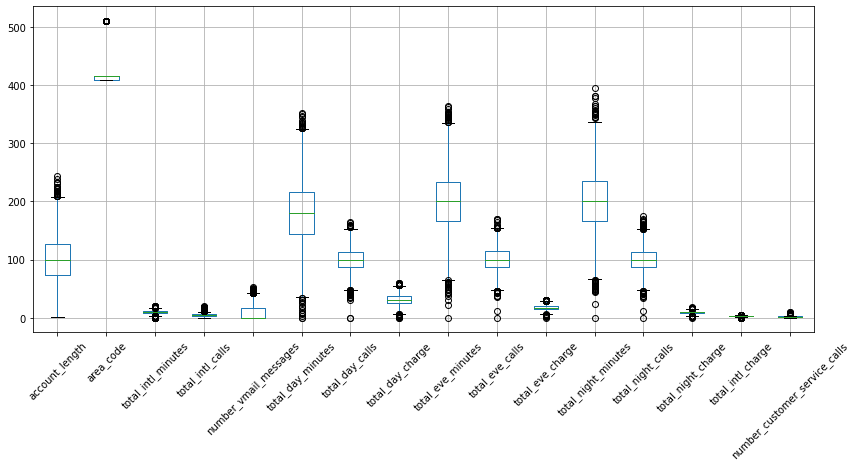

In [21]:
# looking for outliers
num_cols = df.columns.to_list()
num_cols.remove('international_plan')
num_cols.remove('churn')

plt.figure(figsize = (14, 6))
df.boxplot(num_cols)
plt.xticks(rotation = 45)
plt.show()

We see that all the remaining variables have outliers, which we will not drop.

In [22]:
df.head()

,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls,churn
0,101,510,False,10.6,3,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,2.86,3,False
1,137,510,False,9.5,7,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,2.57,0,False
2,103,408,False,13.7,6,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,3.70,1,False
3,99,415,False,15.7,2,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,4.24,1,False
4,108,415,False,7.7,4,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,2.08,2,False


We now save our clean dataset to a new CSV file.

In [23]:
# save the data set to a clean CSV file

df.to_csv('call_center_clean.csv', index = False)

df = pd.read_csv('call_center_clean.csv')
df.head()

,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls,churn
0,101,510,False,10.6,3,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,2.86,3,False
1,137,510,False,9.5,7,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,2.57,0,False
2,103,408,False,13.7,6,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,3.70,1,False
3,99,415,False,15.7,2,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,4.24,1,False
4,108,415,False,7.7,4,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,2.08,2,False


## <font color='#2F4F4F'>3. Data Analysis</font>

### 3.1 Univariate Analysis

In [24]:
# get the summary statistics
df.describe()

,account_length,area_code,total_intl_minutes,total_intl_calls,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,10.261780,4.435200,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,2.771196,1.570400
std,39.69456,42.209182,2.761396,2.456788,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,0.745514,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,8.500000,3.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,2.300000,1.000000
50%,100.00000,415.000000,10.300000,4.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,2.780000,1.000000
75%,127.00000,415.000000,12.000000,6.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,3.240000,2.000000
max,243.00000,510.000000,20.000000,20.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,5.400000,9.000000


415    2495
408    1259
510    1246
Name: area_code, dtype: int64


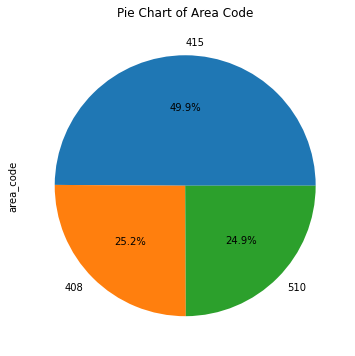

In [25]:
print(df.area_code.value_counts())

plt.figure(figsize = (6, 6))
df.area_code.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Pie Chart of Area Code')
plt.show()

Area Code 415 consists of almost half of the area codes in this dataset. Area Code 510 very slightly outnumbers Area Code 408.

False    4527
True      473
Name: international_plan, dtype: int64


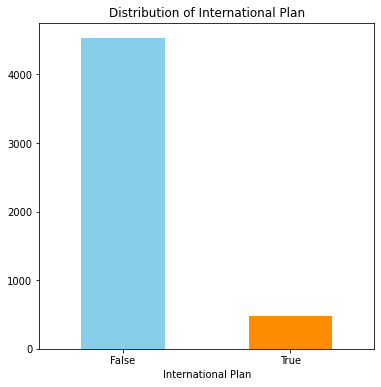

In [26]:
print(df.international_plan.value_counts())

plt.figure(figsize = (6, 6))
df.international_plan.value_counts().plot(kind = 'bar', rot = 0, color = ['skyblue', 'darkorange'])
plt.title('Distribution of International Plan')
plt.xlabel('International Plan')
plt.show()

Very few of the customers are subscribed to an international plan.

1    1786
2    1127
0    1023
3     665
4     252
5      96
6      34
7      13
9       2
8       2
Name: number_customer_service_calls, dtype: int64


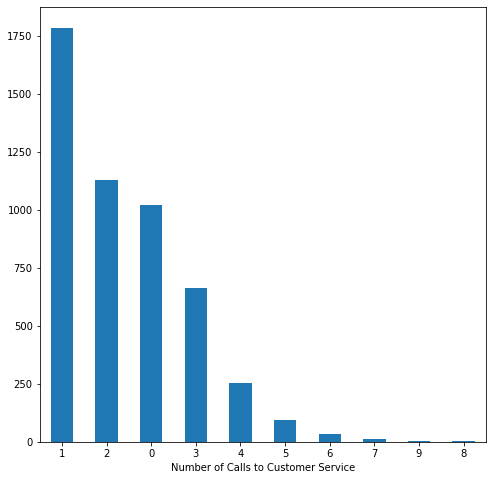

In [27]:
print(df.number_customer_service_calls.value_counts())

plt.figure(figsize = (8, 8))
df.number_customer_service_calls.value_counts().plot(kind = 'bar', rot = 0)
plt.xlabel("Number of Calls to Customer Service")
plt.show()

Most customers made exactly 1 call to customer service followed by those who made 2 calls, and then those who made 0 calls. Those who made more than 5 calls make up the minority.

False    4293
True      707
Name: churn, dtype: int64


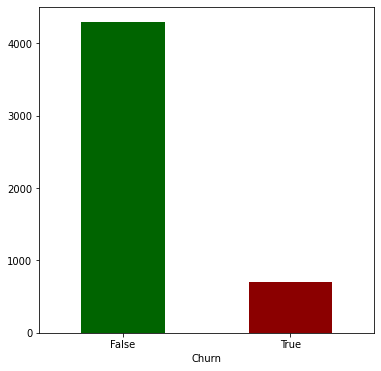

In [28]:
print(df.churn.value_counts())

plt.figure(figsize = (6, 6))
df.churn.value_counts().plot(kind ='bar', rot = 0, color = ['darkgreen', 'darkred'])
plt.xlabel("Churn")
plt.show()

Majority of the customers in this dataset have not churned, thereby making this dataset very biased.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

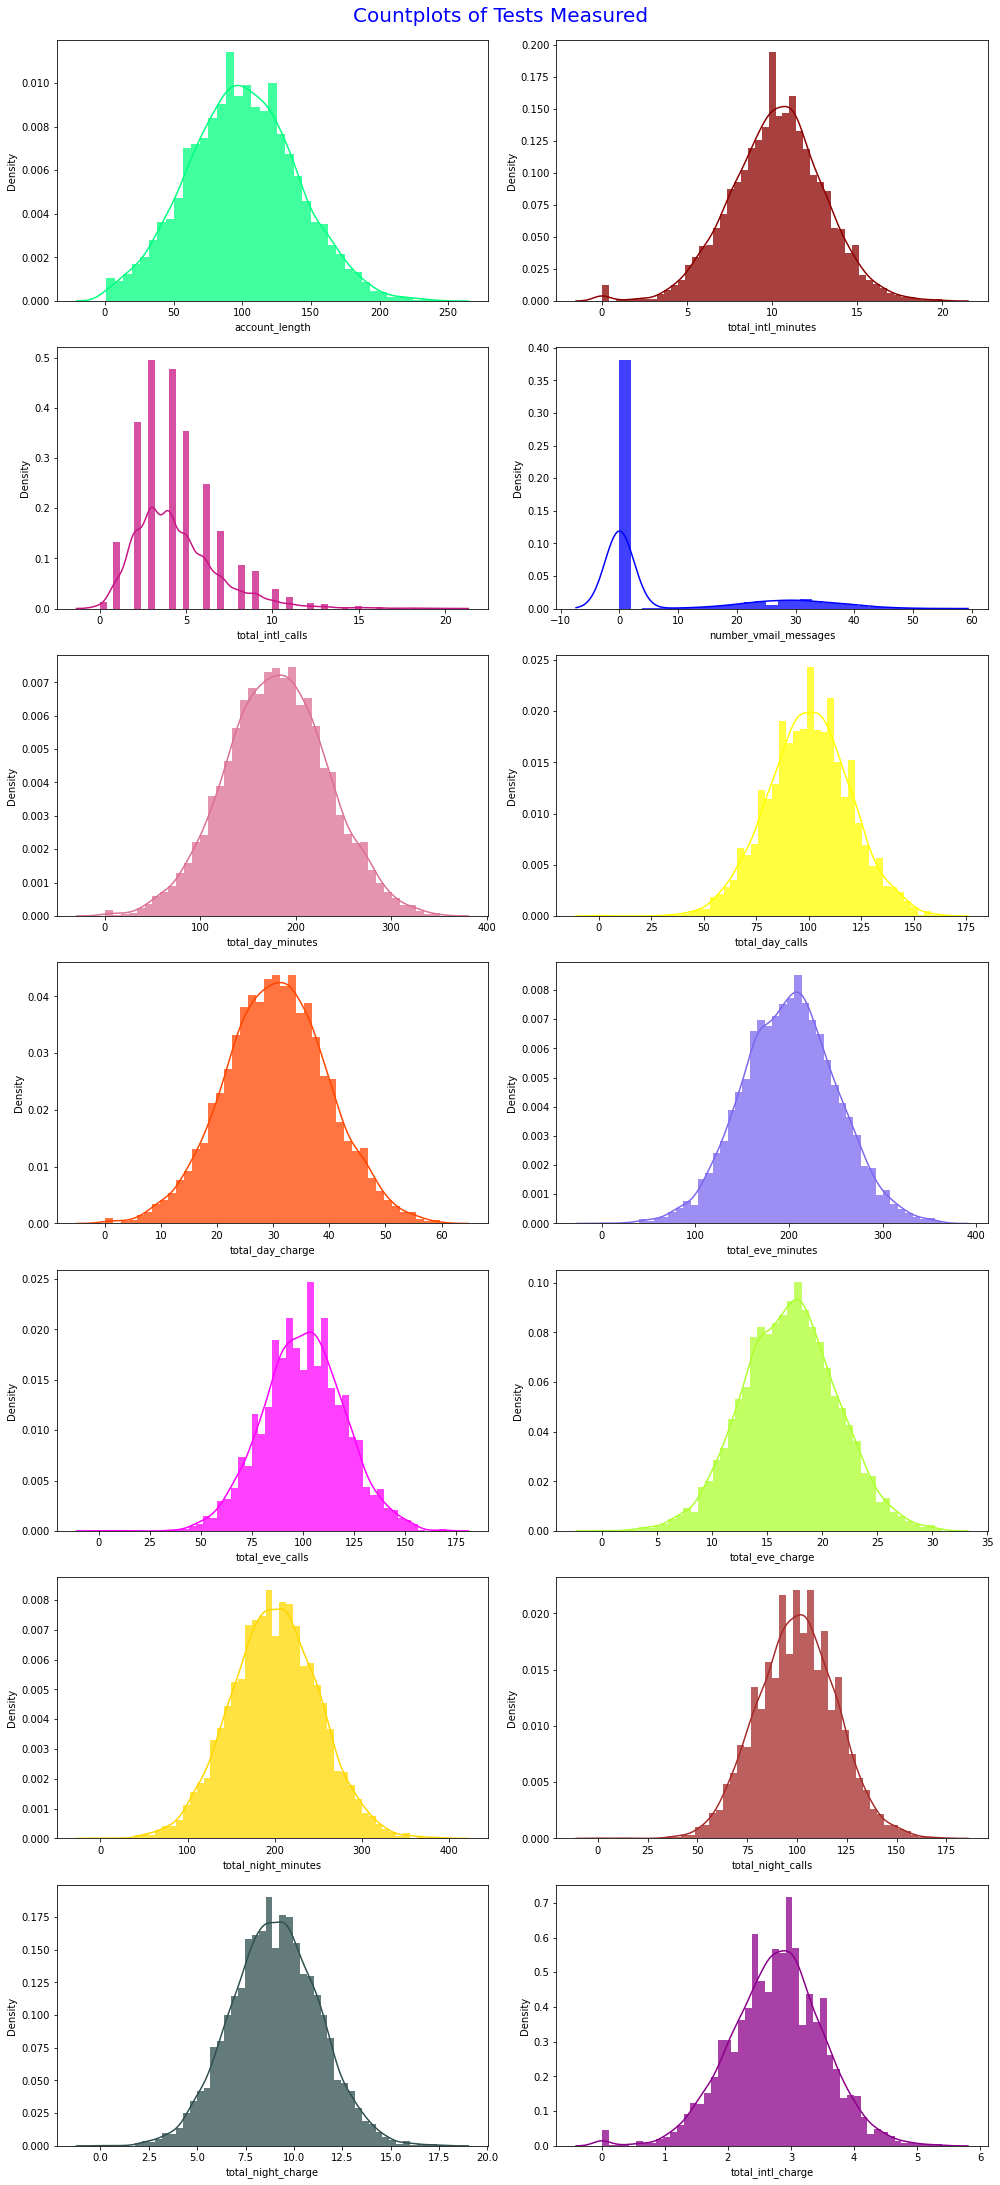

In [29]:
# plotting the histograms of all our numerical variables with the
# exception of 'area_code' and 'number_customer_service_calls'
num_cols.remove('area_code')
num_cols.remove('number_customer_service_calls')

fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize = (14, 30))
plt.suptitle('Countplots of Tests Measured', fontsize = 20, y = 1.01, color = 'blue')

colors = ['#00FF7F', '#8B0000', '#C71585', '#0000FF', '#DB7093', '#FFFF00', '#FF4500',
          '#7B68EE', '#FF00FF', '#ADFF2F', '#FFD700', '#A52A2A', '#2F4F4F', '#8B008B']
for ax, column, color in zip(axes.flatten(), num_cols, colors):
    sns.distplot(df[column], ax = ax, color = color, hist_kws = dict(alpha = 0.75))
    
plt.tight_layout()

Majority of the numerical variables have normal distributions. Apart from having most of its values in the 0-5 bin, the 'number_vmail_messages' variable appears to be normally distributed. The 'total_intl_calls' variable is skewed to the right and is not continuous.

### 3.2 Bivariate Analysis

We will make 'churn' our target variable and look at how the other variables relate to it.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


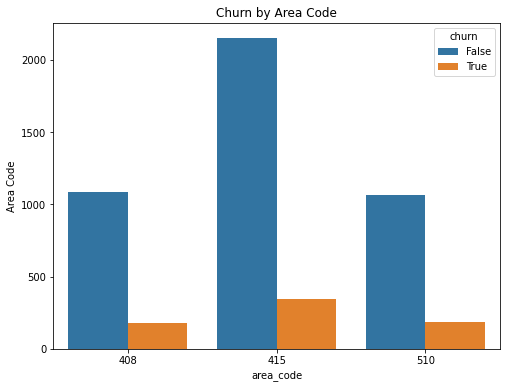

In [30]:
# churn by area code
plt.figure(figsize = (8, 6))
churn_area_code = sns.countplot('area_code', hue = 'churn', data = df)
churn_area_code.set(title = "Churn by Area Code", ylabel = 'Area Code')
plt.show()

Area code 415 reports the highest churn rates.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


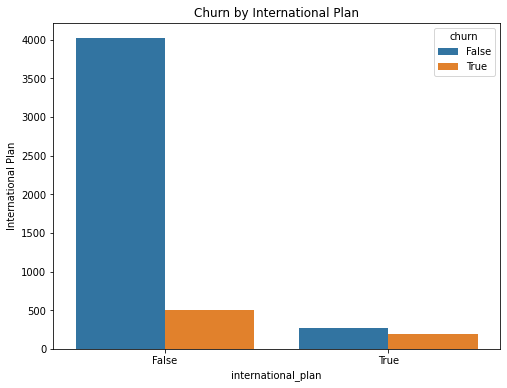

In [31]:
# churn by international plan
plt.figure(figsize = (8, 6))
churn_area_code = sns.countplot('international_plan', hue = 'churn', data = df)
churn_area_code.set(title = "Churn by International Plan", ylabel = 'International Plan')
plt.show()

Those without international plans churned more than those with international plans.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


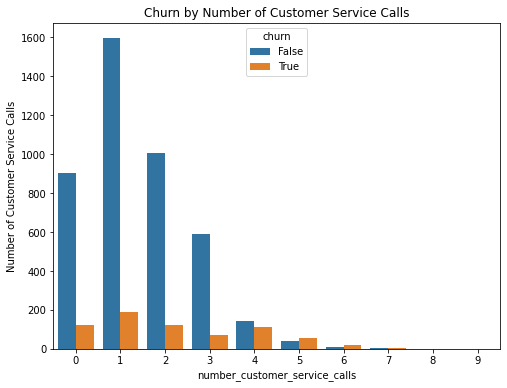

In [32]:
# churn by number of customer service calls
plt.figure(figsize = (8, 6))
churn_area_code = sns.countplot('number_customer_service_calls', hue = 'churn', data = df)
churn_area_code.set(title = "Churn by Number of Customer Service Calls",
                    ylabel = 'Number of Customer Service Calls')
plt.show()

The interesting thing to note here is that those who made 0 or 2 calls to customer service churned at around the same rate. Similarly, those who made more than 3 calls reported high churn rates.

### 3.3 Feature Engineering & Test for Multicollinearity

Before we can carry out the test for multicollinearity (a requirement for logistic regression), we need to convert the values of 'international_plan' and 'churn' to binary.

In [33]:
df['international_plan'] = df['international_plan'].replace({False : 0, True : 1})
df['churn'] = df['churn'].replace({False : 0, True : 1})
df.head()

,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls,churn
0,101,510,0,10.6,3,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,2.86,3,0
1,137,510,0,9.5,7,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,2.57,0,0
2,103,408,0,13.7,6,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,3.70,1,0
3,99,415,0,15.7,2,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,4.24,1,0
4,108,415,0,7.7,4,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,2.08,2,0


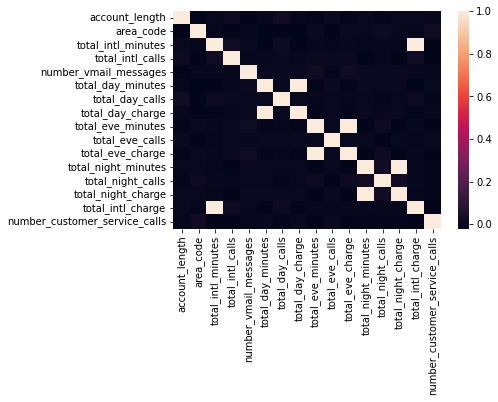

In [40]:
# checking the correlations between the numerical variables
# YOUR CODE HERE

corr = df.drop(['international_plan', 'churn'], axis = 1).corr()

# plotting the correlations onto a heatmap
# YOUR CODE HERE
sns.heatmap(corr)

We see some perfect correlations between the following variables:
- 'total_day_minutes' and 'total_day_charge'
- 'total_eve_minutes' and 'total_eve_charge'
- 'total_night_minutes' and 'total_night_charge'
- 'total_intl_minutes' and 'total_intl_charge'

We will drop the minutes.

In [41]:
# drop the columns with minutes, e.g., 'total_day_minutes', etc.
# YOUR CODE HERE

df.drop(['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes'], axis = 1, inplace = True)

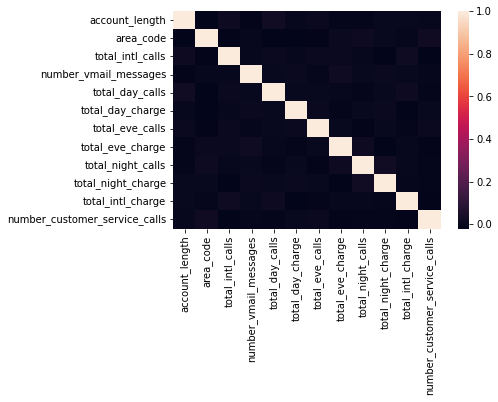

In [42]:
# checking the correlations between the numerical variables
# YOUR CODE HERE
corr = df.drop(['international_plan', 'churn'], axis = 1).corr()

# plotting the correlations onto a heatmap
# YOUR CODE HERE
sns.heatmap(corr)

We will then check the Variance Inflation Factor (VIF) scores to ensure there is no high multicollinearity.

In [45]:
# calculate VIF and plot the heatmap
# YOUR CODE HERE

pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

,account_length,area_code,total_intl_calls,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls
account_length,1.001727,0.017144,-0.013783,0.014456,-0.027704,0.001442,-0.008658,0.009237,0.007102,-0.000968,-0.000697,0.000850
area_code,0.017144,1.002077,0.012724,0.003613,0.018253,0.019184,0.011874,-0.007086,-0.014351,-0.002068,0.003943,-0.020787
total_intl_calls,-0.013783,0.012724,1.001506,-0.000064,-0.009897,0.000946,-0.005526,-0.008056,-0.000494,0.017147,-0.016404,0.018645
number_vmail_messages,0.014456,0.003613,-0.000064,1.000739,-0.001136,-0.005527,0.003895,-0.019443,-0.002080,-0.005724,-0.002526,0.006648
total_day_calls,-0.027704,0.018253,-0.009897,-0.001136,1.001612,-0.001868,-0.003262,0.000376,0.007971,-0.003170,-0.012862,0.010050
total_day_charge,0.001442,0.019184,0.000946,-0.005527,-0.001868,1.001118,-0.007843,0.010595,-0.004484,-0.011371,0.019372,-0.002872
total_eve_calls,-0.008658,0.011874,-0.005526,0.003895,-0.003262,-0.007843,1.000642,-0.003373,0.013494,-0.002260,0.007449,-0.006455
total_eve_charge,0.009237,-0.007086,-0.008056,-0.019443,0.000376,0.010595,-0.003373,1.001366,-0.013646,0.017021,0.000449,0.013759
total_night_calls,0.007102,-0.014351,-0.000494,-0.002080,0.007971,-0.004484,0.013494,-0.013646,1.001523,-0.027118,-0.000594,0.008168
total_night_charge,-0.000968,-0.002068,0.017147,-0.005724,-0.003170,-0.011371,-0.002260,0.017021,-0.027118,1.001611,0.006299,0.008972


We don't see any VIF score of 5 and above, which means our dataset does not have high levels of multicollinearity. We are, therefore, good to go.

## <font color='#2F4F4F'>4. Data Modeling</font>

We will carry out 5 types of classification analysis, namely:
1. Logistic Regression
2. Gaussian Naive Bayes (NB) classification
3. Decision Trees Classification
4. K-Nearest Neighbors (KNN) Classification
5. Support Vector Machine (SVM) Classification

We will then compare the different classification models to assess the best performing one(s).

In [46]:
# dividing our dataset into features (X) and target (y)

# YOUR CODE HERE

X = df.drop(['churn'], axis = 1)
y = df['churn']

In [47]:
# splitting into 80-20 train-test sets

# YOUR CODE HERE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [48]:
# performing feature scaling on our training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fitting and transforming X_train while transforming X_test
# YOUR CODE HERE

sc_X = scaler
sc_y = scaler

X_train = sc_X.fit_transform(X_train)
X_test = sc_y.fit_transform(X_test)

In [49]:
# loading our classification libraries
# YOUR CODE HERE

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# instantiating our classifiers
# YOUR CODE HERE

logistic_classifier = LogisticRegression()
naive_classifier = GaussianNB()
decision_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier()
svm_classifier = SVC()

# fitting our classifiers to the training data
# YOUR CODE HERE

logistic_classifier.fit(X_train, y_train)
naive_classifier.fit(X_train, y_train)
decision_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)

# making predictions
# YOUR CODE HERE

logistic_y_prediction = logistic_classifier.predict(X_test)
naive_y_prediction = naive_classifier.predict(X_test)
decision_y_prediction = decision_classifier.predict(X_test)
knn_y_prediction = knn_classifier.predict(X_test)
svm_y_prediction = svm_classifier.predict(X_test)



In [50]:
# printing the classification report for each classifier to assess performance
from sklearn.metrics import classification_report

# classification report for Logistic Regression
print("Logistic Regression classification report:")
# YOUR CODE HERE
print(classification_report(y_test, logistic_y_prediction))

# classification report for Gaussian Naive Bayes Classifier
print("Gaussian Naive Bayes classification report:")
# YOUR CODE HERE
print(classification_report(y_test, naive_y_prediction)) 

# classification report for Decision Tree Classifier
print("Decision Tree classification report:")
# YOUR CODE HERE
print(classification_report(y_test, decision_y_prediction))

# classification report for K-Nearest Neighbors Classifier
print("K-Nearest Neighbors classification report:")
# YOUR CODE HERE
print(classification_report(y_test, knn_y_prediction))

# classification report for Support Vector Machine Classifier
print("Support Vector Machine classification report:")
# YOUR CODE HERE
print(classification_report(y_test, svm_y_prediction))

Logistic Regression classification report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       849
           1       0.58      0.20      0.30       151

    accuracy                           0.86      1000
   macro avg       0.72      0.59      0.61      1000
weighted avg       0.83      0.86      0.83      1000

Gaussian Naive Bayes classification report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       849
           1       0.50      0.38      0.43       151

    accuracy                           0.85      1000
   macro avg       0.70      0.66      0.67      1000
weighted avg       0.84      0.85      0.84      1000

Decision Tree classification report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       849
           1       0.76      0.74      0.75       151

    accuracy                           0.93      1000
   m

What have you noticed about the performance of the various models?

Observations:
The dataset is highly imbalanced, with the samples evaluated for '0' score being 849 and those evaluated for the '1' score being 151.

The classifier with the best accuracy score is the decision tree classifier at 0.93.

Looking at the macro avg, the decision tree classifier scored fairly for all three metrices, i.e precision, recall and f1-score as compared to the rest of the classifiers.

Also looking at the weighted avg which takes into account the imbalance between the classes, the decision tree classifier had the best scores.

As far as the classification report is concerned, the best classifier for this problem is the decision tree classifier.


## <font color='#2F4F4F'>5. Summary of Findings</font>

Include your findings from the analysis and modeling stages.

1. The fact that all variables (except 'international_plan' & 'churn') had so many outliers begs for further investigation in order to understand this peculiar behaviour.
2. Having the anomaly of marking 'international_plan' as False even in cases where it did not apply has greatly affected our analysis, since this was a wrong classification. A deep dive into this anomaly is required in order to correct it and therefore provide cleaner data for analysis and model training.



In [52]:
df.shape

(5000, 14)

## <font color='#2F4F4F'>6. Recommendations</font>

What recommendations can you provide?

1. More data would be required if sanitizing the anomaly with the 'international_plan' would be found to be a challenge. This would provide our classifiers with more quality variables and therefore improve on their overall effectiveness in predicting the churn behaviour of the customers.

## <font color='#2F4F4F'>7. Challenging your Solution</font>

What can you do to improve your project?

1. I would collect more data, enrich it with two more additional variables for my better understanding of the customer behaviour, i.e.

(a) Was the customer issue resolved (customer reason for calling customer care, Yes, or No)

(b) Would the customer recommend the company, based on their immediate past experience, to family and friends (Yes or No)?